In [1]:
# Napomena: Nisu svi detalji u potpunosti ispravno napravljeni!

In [2]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
import control.matlab as ctrl

ctrl.use_numpy_matrix(flag=False, warn=True)

# 2. a)

In [3]:
m = 4
J = 0.0475
r = 0.25
g = 9.8
c = 0.05

A = np.array([[0,    1, 0,    0,  0, 0],
              [0, -c/m, 0,    0, -g, 0],
              [0,    0, 0,    1,  0, 0],
              [0,    0, 0, -c/m,  0, 0],
              [0,    0, 0,    0,  0, 1],
              [0,    0, 0,    0,  0, 0]])

B = np.array([[  0,   0],
              [1/m,   0],
              [  0,   0],
              [  0, 1/m],
              [  0,   0],
              [r/J,   0]])

C = np.eye(6, 6)

D = np.zeros((6, 2))

sys = ctrl.ss(A, B, C, D)

# b)

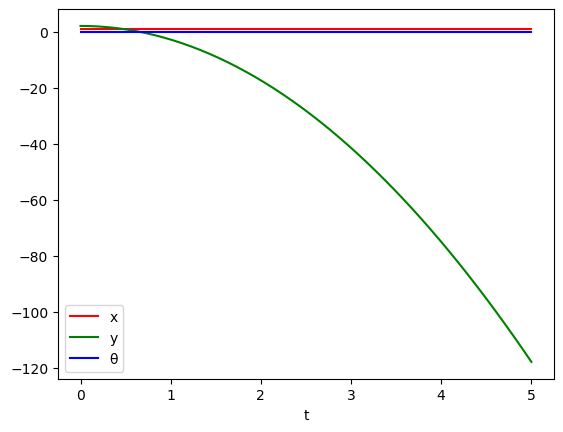

In [4]:
u0 = np.zeros((50, 2))
for i in range(50):
    u0[i, 1] = -m*g

t0 = np.linspace(0, 5, 50)

x0 = np.array([[1],
               [0],
               [2],
               [0],
               [0],
               [0]])

[y_out, t_out, x_out] = ctrl.lsim(sys, u0, t0, x0)

plt.plot(t_out, y_out[:, 0], 'r-', t_out, y_out[:, 2], 'g-', t_out, y_out[:, 4], 'b-')
plt.xlabel('t')
plt.legend(['x', 'y', '\u03B8'])

# c)

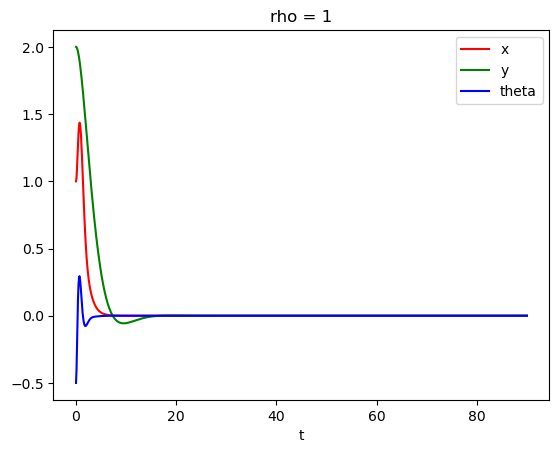

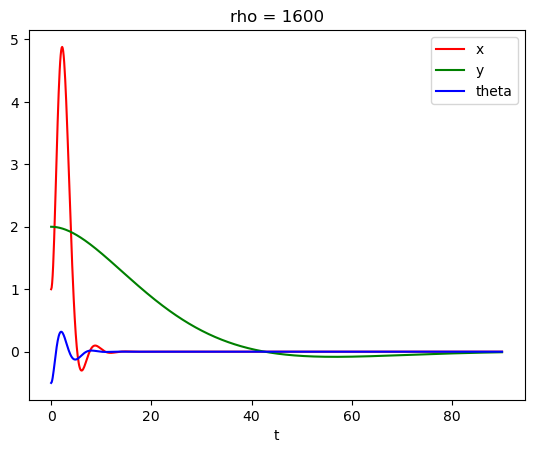

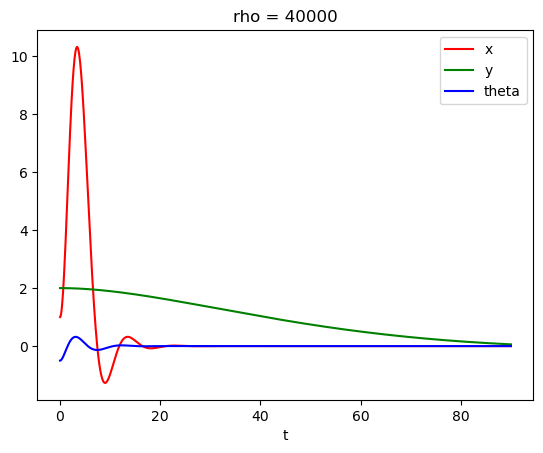

In [5]:
u0 = np.zeros((900, 2))

t0 = np.linspace(0, 90, 900)

x0 = np.array([[   1],
               [   0],
               [   2],
               [   0],
               [-0.5],
               [   0]])

Q = np.eye(6, 6)

# rho = 1
R = 1 * np.eye(2, 2)
[F, X, lam] = ctrl.lqr(sys, Q, R)

K1_A = np.zeros((0, 0))
K1_B = np.zeros((1, 0))
K1_C = np.zeros((0, 6))
K1_D = F

K1 = ctrl.ss(K1_A, K1_B, K1_C, K1_D)
GK1 = ctrl.feedback(sys, K1)
[y_out, t_out, x_out] = ctrl.lsim(GK1, u0, t0, x0)

plt.figure(1)
plt.plot(t_out, y_out[:, 0], 'r-', t_out, y_out[:, 2], 'g-', t_out, y_out[:, 4], 'b-')
plt.title('rho = 1')
plt.xlabel('t')
plt.legend(['x', 'y', 'theta'])

# rho = 1600
R = 1600 * np.eye(2, 2)
[F, X, lam] = ctrl.lqr(sys, Q, R)

K1600_A = np.zeros((0, 0))
K1600_B = np.zeros((1, 0))
K1600_C = np.zeros((0, 6))
K1600_D = F

K1600 = ctrl.ss(K1600_A, K1600_B, K1600_C, K1600_D)
GK1600 = ctrl.feedback(sys, K1600)
[y_out, t_out, x_out] = ctrl.lsim(GK1600, u0, t0, x0)

plt.figure(2)
plt.plot(t_out, y_out[:, 0], 'r-', t_out, y_out[:, 2], 'g-', t_out, y_out[:, 4], 'b-')
plt.title('rho = 1600')
plt.xlabel('t')
plt.legend(['x', 'y', 'theta'])

# rho = 40000
R = 40000 * np.eye(2, 2)
[F, X, lam] = ctrl.lqr(sys, Q, R)

K40000_A = np.zeros((0, 0))
K40000_B = np.zeros((1, 0))
K40000_C = np.zeros((0, 6))
K40000_D = F

K40000 = ctrl.ss(K40000_A, K40000_B, K40000_C, K40000_D)
GK40000 = ctrl.feedback(sys, K40000)
[y_out, t_out, x_out] = ctrl.lsim(GK40000, u0, t0, x0)

plt.figure(3)
plt.plot(t_out, y_out[:, 0], 'r-', t_out, y_out[:, 2], 'g-', t_out, y_out[:, 4], 'b-')
plt.title('rho = 40000')
plt.xlabel('t')
plt.legend(['x', 'y', 'theta'])

# Vidimo da se sustav, za rho = 1, stabilizirao nakon ~15 sekundi, nakon ~45 sekundi za rho = 1600
# te nakon ~85 sekundi za rho = 40000.
# Horizontalni pomak i nagib aviona su se puno brze stabilizirali nego vertikalni pomak.
# Sto je rho veci, to se avion sporije spusta.